In [21]:
!pip install optuna

In [22]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import sklearn.datasets
import sklearn.preprocessing
import sklearn.pipeline
import sklearn.model_selection
import sklearn.metrics

import sklearn.linear_model
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.svm
import sklearn.neighbors

from tensorflow import keras

import optuna

In [23]:
print(np.__version__)
print(pd.__version__)
print(matplotlib.__version__)
print(sklearn.__version__)
print(keras.__version__)
print(optuna.__version__)

2.0.2
2.2.2
3.10.0
1.6.1
3.8.0
4.2.1


In [24]:
import zipfile
import os
from PIL import Image
import csv
from google.colab import files

# Descompactar os arquivos zip
for zip_filename in ['Cohesive.zip', 'Easyflowing.zip', 'Freeflowing.zip']:
  with zipfile.ZipFile(f'/content/{zip_filename}', 'r') as zip_ref:
    # Added a check to see if the directory already exists, and skip extraction if it does
    extract_path = os.path.join('/content/', os.path.splitext(zip_filename)[0])
    if not os.path.exists(extract_path):
        zip_ref.extractall('/content/')
    else:
        print(f"Skipping extraction of {zip_filename} as directory {extract_path} already exists.")

Skipping extraction of Cohesive.zip as directory /content/Cohesive already exists.
Skipping extraction of Easyflowing.zip as directory /content/Easyflowing already exists.
Skipping extraction of Freeflowing.zip as directory /content/Freeflowing already exists.


Nicolle, para gerar o código acima, usei o seguinte prompt: Gostaria de descompactar as pastas Cohesive.zip, Easyflowing.zip e Freeflowing.zip que estão no diretório /content. Dentro de cada pasta, tenho arquivos de imagem.

In [25]:
# Criar o arquivo CSV
csv_filename = 'images.csv'
with open(csv_filename, 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  # Cabeçalho do CSV
  header = ['label'] + [f'pixel{i}' for i in range(784)] + ['ImageId', 'FCC']
  writer.writerow(header)

  # Processar as imagens
  for folder in ['Cohesive', 'Easyflowing', 'Freeflowing']:
    for filename in os.listdir(f'/content/{folder}'):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(f'/content/{folder}', filename)
            try:
                img = Image.open(image_path).convert('L').resize((28, 28)) # Conversão para escala de cinza e redimensionamento
                pixels = list(img.getdata())
                image_id = os.path.splitext(filename)[0]
                fcc = folder
                row = [0] + pixels + [image_id, fcc] # Ajuste para o label 0
                writer.writerow(row)
            except Exception as e:
                print(f"Erro ao processar a imagem {filename}: {e}")

Nicolle, para gerar o código acima, usei o seguinte prompt:  Gostaria de migrar as imagens para escala de cinza e escrever as imagens em termos de seus pixels, cada imagem precisa ter 28 pixels na altura e 28 no comprimento. Gostaria de que essas novas informações fossem reunidas em um arquivo csv. A penúltima coluna do csv precisa ter o nome do arquivo de imagem (sem o jpg). O título desta coluna é ImageId.  A última coluna do csv tem nome FCC e indica o nome da pasta de origem sem a extensão .zip. Cada linha do csv corresponde a uma imagem e cada coluna, a um pixel da imagem (com exceção da primeira coluna, label, que identifica o dígito). São 784 pixels, já que as imagens têm tamanho 28x28.

In [26]:
# Fazer o download do arquivo CSV
files.download(csv_filename)

# Criar o DataFrame a partir do CSV
import pandas as pd
df = pd.read_csv(csv_filename)
print(df.head())


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      0     186     184     184     184     183     183     184     184   
1      0     180     179     179     179     178     179     179     179   
2      0     187     187     187     187     187     186     186     186   
3      0     186     186     184     184     184     183     184     185   
4      0     186     185     185     185     185     185     185     185   

   pixel8  ...  pixel776  pixel777  pixel778  pixel779  pixel780  pixel781  \
0     184  ...       184       185       185       185       185       185   
1     179  ...       178       179       179       179       179       181   
2     187  ...       186       186       186       186       186       185   
3     184  ...       181       166       180       185       183       177   
4     185  ...       184       184       183       184       184       184   

   pixel782  pixel783                    ImageId       FCC  
0       186  

Nicolle, usei o promp para gerar o código acima:  Quero fazer o download do arquivo csv. Depois quero criar um dataframe a partir do csv.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Columns: 787 entries, label to FCC
dtypes: int64(785), object(2)
memory usage: 596.5+ KB


In [28]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780', 'pixel781',
       'pixel782', 'pixel783', 'ImageId', 'FCC'],
      dtype='object', length=787)

In [29]:
# prompt: Gostaria de copiar as coluna ImageId e FCC para um novo dataframe de nome df1. Após isso, quero remover ImageId de df e transformar a coluna FCC para 3 classes distintas (1, 2 e 3). Preciso que seja salvo um dicionário indicando a que 1 corresponde, e 2 e 3 também para conferência posterior.

# Criar o dataframe df1 com as colunas 'ImageId' e 'FCC'
df1 = df[['ImageId', 'FCC']].copy()

# Remover a coluna 'ImageId' do dataframe df
df = df.drop('ImageId', axis=1)

# Criar o dicionário para mapear os valores de FCC para as classes
fcc_mapping = {'Cohesive': 1, 'Easyflowing': 2, 'Freeflowing': 3}
print(f"Dicionário de mapeamento: {fcc_mapping}")

# Substituir os valores da coluna 'FCC' no dataframe df pelas classes
df['FCC'] = df['FCC'].map(fcc_mapping)


Dicionário de mapeamento: {'Cohesive': 1, 'Easyflowing': 2, 'Freeflowing': 3}


In [30]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,FCC
count,97.0,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,...,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,0.0,184.082474,183.381443,183.247423,183.226804,183.113402,183.030928,182.783505,182.670103,182.773196,...,182.628866,182.608247,182.494845,182.804124,182.752577,182.773196,183.237113,184.814433,184.886598,2.030928
std,0.0,3.114717,3.073554,3.168961,3.097395,3.105359,3.103941,3.247521,3.296847,3.190171,...,3.076523,3.090836,3.458455,3.016065,3.152482,2.956297,2.473919,1.522949,1.682485,0.809496
min,0.0,172.000000,172.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,171.000000,172.000000,166.000000,170.000000,171.000000,173.000000,172.000000,178.000000,181.000000,1.000000
25%,0.0,183.000000,182.000000,182.000000,182.000000,182.000000,182.000000,181.000000,181.000000,181.000000,...,182.000000,181.000000,181.000000,182.000000,182.000000,182.000000,182.000000,184.000000,184.000000,1.000000
50%,0.0,185.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,...,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,184.000000,185.000000,186.000000,2.000000
75%,0.0,186.000000,186.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,...,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,186.000000,186.000000,3.000000
max,0.0,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,...,187.000000,186.000000,186.000000,186.000000,186.000000,186.000000,187.000000,187.000000,187.000000,3.000000


In [31]:
# prompt: Gostaria de remover a coluna label

# Remover a coluna 'label' do DataFrame df
df = df.drop('label', axis=1)


A escala de cinza de 8-bit vai de 0 (preto) a 255 (branco). Veja que não temos branco pois os pixels vão até 187.

Nosso dataframe está com 97  linhas. É isso mesmo? Conferir no artigo.

In [32]:
# prompt: Gostaria de gerar um código com a contagem de valores únicos para a coluna FCC

# Count unique values in the 'FCC' column
unique_fcc_counts = df['FCC'].value_counts()
unique_fcc_counts


,count
FCC,
2,34
3,33
1,30


Classe 1 tem 30, 2 tem 34 e 3 tem 33. É isso mesmo?

In [33]:
X, y = df.iloc[:,:-1].values/255, df.iloc[:,-1].values

X.shape, y.shape

((97, 784), (97,))

In [34]:
df.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'FCC'],
      dtype='object', length=785)

In [35]:
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,FCC
0,186,184,184,184,183,183,184,184,184,184,...,185,184,185,185,185,185,185,186,185,1
1,180,179,179,179,178,179,179,179,179,179,...,177,178,179,179,179,179,181,184,183,1
2,187,187,187,187,187,186,186,186,187,184,...,182,186,186,186,186,186,185,186,186,1
3,186,186,184,184,184,183,184,185,184,184,...,184,181,166,180,185,183,177,184,186,1
4,186,185,185,185,185,185,185,185,185,184,...,184,184,184,183,184,184,184,184,184,1


A divisão por 255 é uma normalização que converte os pixels da faixa 0-255 para a faixa 0-1, o que melhora o desempenho das redes neurais e alguns modelos baseados em distância. Talvez para nós seja mais interessante trabalhar entre 0 e 187. Vamos deixar assim por enquanto

Usando o matplotlib para dar uma olhada nas imagens:

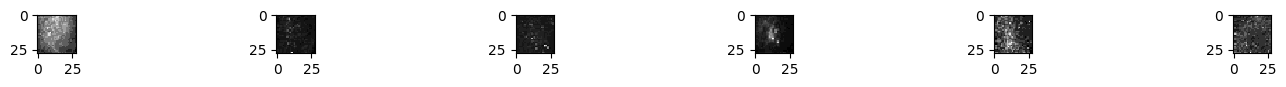

In [36]:
# localização dos exemplos na matriz de dados
loc = [0,10,24,50,78,90] #6 exemplos

# selecionando a imagem, já no formato de matriz
imagem_localizada = [X[i].reshape(28,28) for i in loc]

# criando figura do matplotlib
fig, ax = plt.subplots(1,len(loc),figsize=(18,0.5))

# plotando!
[ax[i].imshow(imagem_localizada[i], cmap = matplotlib.cm.binary, interpolation="nearest") for i in range(len(loc))]

# desligando os eixos de todos os dígitos
#[ax[i].axis('off') for i in range(len(loc))];

Separando treino e teste:

In [37]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,
                                                                            test_size=0.2,
                                                                            random_state=0)

Na próxima célula, instanciaremos um modelo simples conhecido como regressão logística. Apesar do nome enganoso, o modelo serve para problemas de classificação, não de regressão. É equivalente a uma rede neural sem camadas ocultas composta de um único neurônio com função de ativação logística na camada de saída:

In [38]:
modelo = sklearn.linear_model.LogisticRegression(max_iter = 2000)

Abaixo efetuamos a validação cruzada com cv=5. Para tal, a função cross_val_score aceita um modelo, os dados X e y e a métrica de avaliação:

In [39]:
results = sklearn.model_selection.cross_val_score(modelo, X_train, y_train, scoring='accuracy')
results

array([0.3125    , 0.25      , 0.26666667, 0.4       , 0.53333333])

Veja que a acurária nos 5 grupos do treinamento não ficou próxima. INdicando que o modelo está mal configurado. Vamos usar o optuna para melhorar. Isso sem muita pretenção, pois o modelo Logístico é muito simples:

In [40]:
# prompt: Gostaria de utilizar o optuna para melhorar a acurácia da classificação. Desejo fazer validação cruzada com cv=5. Desejo otimizar todos os parâmetros do modelo LogisticRegression

def objective(trial):
    # Define the hyperparameter search space
    solver = trial.suggest_categorical("solver", ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
    penalty = trial.suggest_categorical("penalty", ['l1', 'l2', 'elasticnet', 'none'])
    C = trial.suggest_float("C", 1e-10, 1e10, log=True)


    # Create the model
    model = sklearn.linear_model.LogisticRegression(
        solver=solver, penalty=penalty, C=C, max_iter=1000, random_state=0
    )

    # Perform cross-validation
    try:
        # Perform cross-validation
        score = sklearn.model_selection.cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        accuracy = score.mean()
    except ValueError:
        # If ValueError occurs (invalid solver/penalty combination), return a low accuracy
        accuracy = float('-inf')  # or any other low value to discourage this combination

    return accuracy

# Create a study object and optimize the objective function
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and accuracy
print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

# Train the model with the best hyperparameters
best_model = sklearn.linear_model.LogisticRegression(**trial.params, max_iter=1000, random_state=0)
best_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
print(f"\nAccuracy on the test set: {accuracy}")


[I 2025-03-31 18:22:57,880] A new study created in memory with name: no-name-6732cc40-9a45-42af-9823-5b62d00076d5
[I 2025-03-31 18:22:57,925] Trial 0 finished with value: -inf and parameters: {'solver': 'newton-cg', 'penalty': 'l1', 'C': 204919340.85455745}. Best is trial 0 with value: -inf.
[I 2025-03-31 18:22:57,954] Trial 1 finished with value: -inf and parameters: {'solver': 'lbfgs', 'penalty': 'l1', 'C': 3.223897326850582e-07}. Best is trial 0 with value: -inf.
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr

Best trial:
  Value:  0.3766666666666666
  Params: 
    solver: sag
    penalty: l2
    C: 0.027978888624743955

Accuracy on the test set: 0.25


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Acim, só teste 100 iterações pq não tinha esperanças de que o modelo funcionasse. É um exemplo de como funciona o optuna para busca de parâmetros de um modelo. Vamos fazer um teste sem o optuna, usando os parâmetros default de diversos modelo, pra ver se algum deles tem a chance de ter uma acurácia melhor:

Curvas de aprendizado exibem a relação entre o desempenho de um modelo e o número de amostras do conjunto de treinamento.

Abaixo utilizamos a função learning_curve para plotar as curvas de aprendizado dos modelos analisados na seção anterior. Cada ponto em uma curva resulta de um procedimento de validação cruzada.

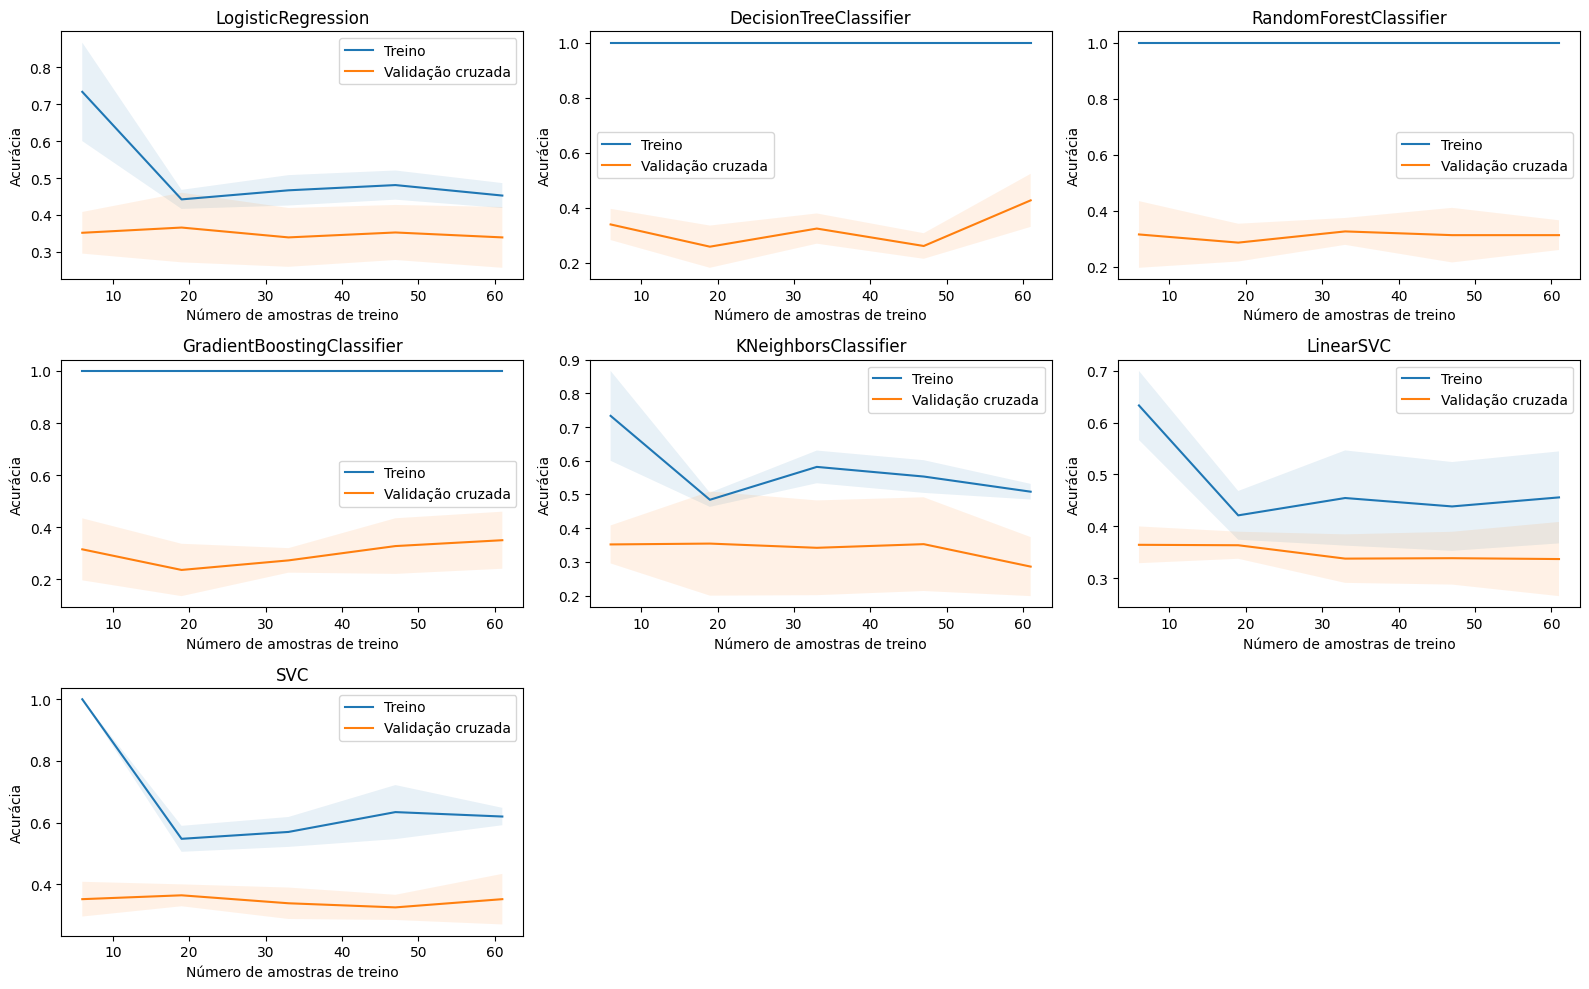

In [41]:
# especificando modelos

modelos = [

    sklearn.linear_model.LogisticRegression(),
    sklearn.tree.DecisionTreeClassifier(),
    sklearn.ensemble.RandomForestClassifier(),
    sklearn.ensemble.GradientBoostingClassifier(),
    sklearn.neighbors.KNeighborsClassifier(),
    sklearn.svm.LinearSVC(),
    sklearn.svm.SVC()

]

fig, ax = plt.subplots(3,3,figsize=(16,10))

for i in range(len(modelos)):

    # calculando a curva de aprendizado!
    train_sizes, train_scores, test_scores = sklearn.model_selection.learning_curve(modelos[i],
                                                                                    X_train, y_train,
                                                                                    cv=5,
                                                                                    scoring='accuracy',
                                                                                    n_jobs=-1)

    # médias e desvios-padrão dos resultados da validação cruzada (para cada ponto da curva)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # plotando curva correspondente ao treino
    ax.ravel()[i].plot(train_sizes, train_scores_mean, label="Treino")
    ax.ravel()[i].fill_between(train_sizes, train_scores_mean - train_scores_std,
                               train_scores_mean + train_scores_std, alpha=0.1)

    # plotando curva correspondente ao teste
    ax.ravel()[i].plot(train_sizes, test_scores_mean, label="Validação cruzada")
    ax.ravel()[i].fill_between(train_sizes, test_scores_mean - test_scores_std,
                               test_scores_mean + test_scores_std, alpha=0.1)

    # formatando gráfico
    ax.ravel()[i].set_title(modelos[i].__class__.__name__)
    ax.ravel()[i].set_ylabel('Acurácia')
    ax.ravel()[i].set_xlabel('Número de amostras de treino')
    ax.ravel()[i].legend(loc="best")

ax.ravel()[-2].axis('off')
ax.ravel()[-1].axis('off')

fig.tight_layout();

Acima, testei os seguinte modelos:    sklearn.linear_model.LogisticRegression(),
    sklearn.tree.DecisionTreeClassifier(),
    sklearn.ensemble.RandomForestClassifier(),
    sklearn.ensemble.GradientBoostingClassifier(),
    sklearn.neighbors.KNeighborsClassifier(),
    sklearn.svm.LinearSVC(),
    sklearn.svm.SVC() só que sem sintonia automática.

Pra validação cruzada, dos 5 grupos, em 4 ele treina e no 5º ele testa. Não é o mesmo grupo que chamamos de teste anteriormente. Veja que a acurácia do teste não bate com a do treinamento. Mostrando que nenhum modelo é bom. Esse tipo de gráfico é um norte pra encontramos um modelo candidato a trabalhos futuros, mas como não tem sintonia automática, não é a resposta final.